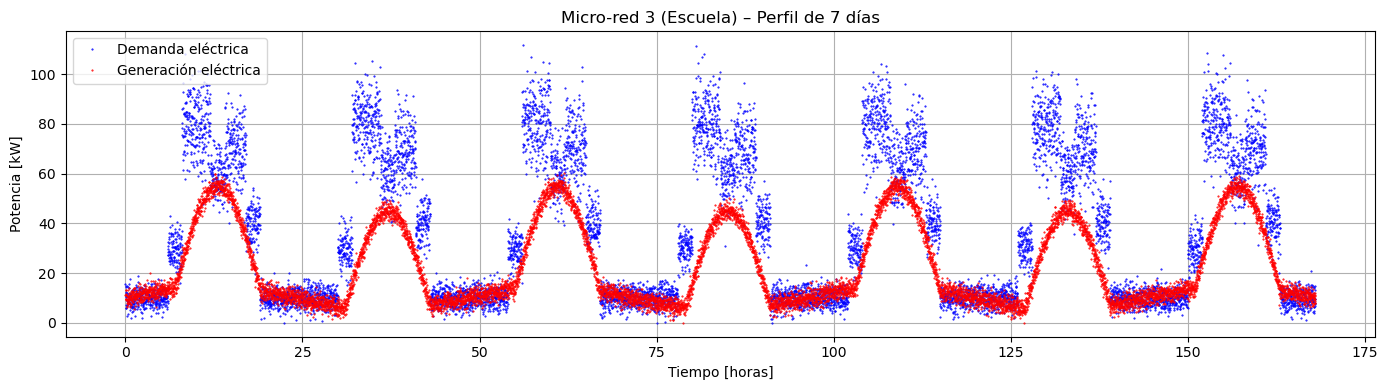

In [ ]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# === 1. Parámetros de simulación ===
Ts = 60               # paso de simulación: 1 minuto
Tsim = 7 * 24 * 3600  # 7 días en segundos
Nt = Tsim // Ts       # total de muestras (7 días × 24 h × 60 min)
t = np.arange(Nt) * Ts / 3600  # vector de tiempo en horas (para graficación)

# === 2. Generación del perfil de demanda eléctrica (P_dem) ===
P_dem = np.zeros(Nt)
for day in range(7):
    for h in range(24):
        idx = (day * 24 + h) * 60  # índice inicial de esta hora
        # Definir demanda por minutos dentro de cada hora
        if 6 <= h < 8:
            val = np.random.normal(30, 5, 60)    # arranque
        elif 8 <= h < 12:
            val = np.random.normal(80, 10, 60)   # clases mañana
        elif 12 <= h < 14:
            val = np.random.normal(60, 8, 60)    # almuerzo
        elif 14 <= h < 17:
            val = np.random.normal(70, 10, 60)   # clases tarde
        elif 17 <= h < 19:
            val = np.random.normal(40, 6, 60)    # cierre actividad
        else:
            val = np.random.normal(10, 3, 60)    # baja nocturna
        P_dem[idx:idx+60] = np.clip(val, 0, None)

# === 3. Generación del perfil de generación eléctrica (P_gen) ===
P_gen = np.zeros(Nt)
#  Patrón base con un seno lento + ruido pensando en eólica
np.random.seed(42)
wind_base = 10 + 5 * np.sin(2 * np.pi * np.arange(Nt) / (1440 * 2))
wind_noise = np.random.normal(0, 2, Nt)
# Solar tipo "campana" entre 7:00 y 19:00
for i in range(Nt):
    hora = t[i] % 24
    G_solar = max(0, np.sin((np.pi / 12) * (hora - 7))) * 40
    P_gen[i] = G_solar + max(0, wind_base[i] + wind_noise[i])

# === 4. Guardar en archivos .mat ===
sio.savemat("P_dem_escuela_replicado.mat", {"P_dem": P_dem})
sio.savemat("P_gen_escuela_replicado.mat", {"P_gen": P_gen})

# === 5. Graficar ===
plt.figure(figsize=(14, 4))
plt.plot(t, P_dem, 'b.', markersize=1, label='Demanda eléctrica')
plt.plot(t, P_gen, 'r.', markersize=1, label='Generación eléctrica')
plt.xlabel('Tiempo [horas]')
plt.ylabel('Potencia [kW]')
plt.title('Micro-red 3 (Escuela) – Perfil de 7 días')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
